<a href="https://colab.research.google.com/github/Saeed2761989/Toronto-Air-bnb/blob/main/W25_Final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
import numpy as np
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from textblob import TextBlob

In [118]:
random_state = 30

#Data Loading

In [119]:
listings = pd.read_csv("https://raw.githubusercontent.com/Saeed2761989/Toronto-Air-bnb/refs/heads/main/listings.csv")
reviews = pd.read_csv("https://media.githubusercontent.com/media/Saeed2761989/Toronto-Air-bnb/refs/heads/main/reviews.csv")
neighbourhoods = pd.read_csv("https://raw.githubusercontent.com/Saeed2761989/Toronto-Air-bnb/refs/heads/main/neighbourhoods.csv")

#Data Cleaning


###listing cleaning

In [120]:
listings.shape

(21660, 79)

In [121]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,696407278180533419,https://www.airbnb.com/rooms/696407278180533419,20250302144713,2025-03-03,city scrape,Lovely Location,You'll have a great time at this comfortable p...,The area includes:<br />Restaurants<br />- Cas...,https://a0.muscache.com/pictures/2de3b6fe-eeeb...,134799582,...,5.0,5.00,4.9,STR-2206-FXYKVD,f,3,3,0,0,0.33
1,696457318817239920,https://www.airbnb.com/rooms/696457318817239920,20250302144713,2025-03-03,city scrape,31-201 simple living space with private washroom,"Located in the city and China town center,1 mi...","Chinatown, Kensington market, uOFT",https://a0.muscache.com/pictures/hosting/Hosti...,471873988,...,5.0,5.00,5.0,NaN,t,8,0,8,0,0.37
2,696460661218975906,https://www.airbnb.com/rooms/696460661218975906,20250302144713,2025-03-03,city scrape,Basement Modern living space with private wash...,It’s basement room with private washroom.Locat...,NaN,https://a0.muscache.com/pictures/cb2c1913-3877...,471873988,...,NaN,NaN,NaN,NaN,t,8,0,8,0,NaN
3,696464107547351397,https://www.airbnb.com/rooms/696464107547351397,20250302144713,2025-03-03,previous scrape,Basement clean room in Kensington Market,"Located in the city and China town center,1 mi...",NaN,https://a0.muscache.com/pictures/fcc2dd2e-4d4b...,471873988,...,5.0,4.50,5.0,NaN,t,8,0,8,0,0.60
4,696602542310304703,https://www.airbnb.com/rooms/696602542310304703,20250302144713,2025-03-03,city scrape,Downtown Private 1 Bedroom Apartment with Patio,Downtown Toronto in the heart of Queen St betw...,"Explore all the City has to offer on foot, bic...",https://a0.muscache.com/pictures/airflow/Hosti...,1498613,...,5.0,4.91,5.0,NaN,f,1,1,0,0,0.39


In [122]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.166000e+04,2.166000e+04,2.166000e+04,21641.000000,21641.000000,0.0,21660.000000,21660.000000,21660.000000,15863.000000,...,16442.000000,16442.000000,16442.000000,16441.000000,16442.000000,21660.000000,21660.000000,21660.000000,21660.000000,16444.000000
mean,6.162714e+17,2.025030e+13,2.315979e+08,6.661199,10.489164,NaN,43.684451,-79.397439,3.183703,1.289227,...,4.746162,4.856000,4.872512,4.840182,4.706124,4.890951,2.534995,2.350970,0.004986,1.283649
std,5.341126e+17,5.035272e+00,2.117178e+08,17.274197,29.935917,NaN,0.050091,0.071721,2.011166,0.618227,...,0.413312,0.321657,0.322582,0.285564,0.406720,11.643615,7.780640,8.621352,0.095482,1.664607
min,1.419000e+03,2.025030e+13,1.565000e+03,1.000000,1.000000,NaN,43.585750,-79.623950,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.384958e+07,2.025030e+13,3.752000e+07,1.000000,1.000000,NaN,43.646387,-79.430200,2.000000,1.000000,...,4.670000,4.840000,4.880000,4.800000,4.630000,1.000000,0.000000,0.000000,0.000000,0.180000
50%,7.727004e+17,2.025030e+13,1.547362e+08,2.000000,3.000000,NaN,43.665365,-79.397431,2.000000,1.000000,...,4.880000,4.960000,4.980000,4.930000,4.800000,1.000000,1.000000,0.000000,0.000000,0.580000
75%,1.123401e+18,2.025030e+13,4.445227e+08,4.000000,6.000000,NaN,43.711504,-79.372980,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,4.940000,3.000000,1.000000,2.000000,0.000000,1.850000
max,1.367403e+18,2.025030e+13,6.816306e+08,283.000000,583.000000,NaN,43.837740,-79.126170,16.000000,20.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,95.000000,99.000000,3.000000,29.040000


In [123]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [124]:
# Drop irrelevant columns
listings = listings.drop(['source', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview',
                          'picture_url', 'host_url', 'host_name', 'host_location', 'host_about',  'bathrooms_text',
                          'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',  'calendar_last_scraped',
                          'neighbourhood', 'neighbourhood_group_cleansed', 'latitude', 'longitude',
                          'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                          'maximum_maximum_nights', 'calendar_updated', "availability_eoy", "estimated_occupancy_l365d", "estimated_revenue_l365d" ,
                          'has_availability', 'availability_30', 'availability_60', 'availability_90',
                          'number_of_reviews_l30d', 'license', 'calculated_host_listings_count',
                          'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                          'calculated_host_listings_count_shared_rooms', 'host_verifications'], axis=1)

In [125]:
listings.isna().sum()

,0
id,0
host_id,0
host_since,19
host_response_time,7501
host_response_rate,7501
host_acceptance_rate,5834
host_is_superhost,872
host_listings_count,19
host_total_listings_count,19
host_has_profile_pic,19


shrinking dataset: reducing the dataset to start from 2022

In [126]:
listings.dropna(subset=['first_review', 'last_review'], inplace=True)

listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['first_review'] = pd.to_datetime(listings['first_review'])

listings = listings[listings['last_review'].dt.year >= 2022].reset_index(drop=True)
print(listings.shape)

(13662, 39)


In [127]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13662 entries, 0 to 13661
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           13662 non-null  int64         
 1   host_id                      13662 non-null  int64         
 2   host_since                   13651 non-null  object        
 3   host_response_time           11333 non-null  object        
 4   host_response_rate           11333 non-null  object        
 5   host_acceptance_rate         12652 non-null  object        
 6   host_is_superhost            12998 non-null  object        
 7   host_listings_count          13651 non-null  float64       
 8   host_total_listings_count    13651 non-null  float64       
 9   host_has_profile_pic         13651 non-null  object        
 10  host_identity_verified       13651 non-null  object        
 11  neighbourhood_cleansed       13662 non-nu

converting to neumerical

In [128]:
# Convert percentage columns to numeric
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype(float)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%').astype(float)

# Convert price to numeric
listings['price'] = listings['price'].replace({'\$':'', ',':''}, regex=True).astype(float)

# Convert boolean columns from 't'/'f' to 1/0
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in bool_cols:
    listings[col] = listings[col].map({'t': 1, 'f': 0})

# Convert categorical columns using Label Encoding
categorical_cols = ['host_response_time', 'property_type', 'room_type', 'neighbourhood_cleansed']
categorical_cols_le = {}
for col in categorical_cols:
    listings[col] = listings[col].fillna('missing')
    le = LabelEncoder()
    categorical_cols_le[col] = le
    listings[col] = le.fit_transform(listings[col])

# Handle date columns: Convert dates to days since today
date_cols = ['host_since', 'first_review', 'last_review']
today = pd.Timestamp.today()
for col in date_cols:
    listings[col] = pd.to_datetime(listings[col], errors='coerce')
    listings[col] = (today - listings[col]).dt.days

# Amenities: Convert to numeric count (number of amenities)
listings['amenities_count'] = listings['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
listings.drop(columns=['amenities'], inplace=True)

# Handle missing numerical data with median imputation
numerical_cols = listings.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    listings[col] = listings[col].fillna(listings[col].median())

# Now, your DataFrame 'df' should be fully numeric and clean:
print(listings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13662 entries, 0 to 13661
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           13662 non-null  int64  
 1   host_id                      13662 non-null  int64  
 2   host_since                   13662 non-null  float64
 3   host_response_time           13662 non-null  int64  
 4   host_response_rate           13662 non-null  float64
 5   host_acceptance_rate         13662 non-null  float64
 6   host_is_superhost            13662 non-null  float64
 7   host_listings_count          13662 non-null  float64
 8   host_total_listings_count    13662 non-null  float64
 9   host_has_profile_pic         13662 non-null  float64
 10  host_identity_verified       13662 non-null  float64
 11  neighbourhood_cleansed       13662 non-null  int64  
 12  property_type                13662 non-null  int64  
 13  room_type       

In [129]:
listings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,amenities_count
0,696407278180533419,134799582,2849.0,4,100.0,76.0,0.0,7.0,7.0,1.0,...,5.00,5.00,4.90,5.00,5.00,5.00,4.90,0,0.33,19
1,696457318817239920,471873988,978.0,4,100.0,100.0,1.0,8.0,9.0,1.0,...,5.00,5.00,4.50,5.00,5.00,5.00,5.00,1,0.37,32
2,696464107547351397,471873988,978.0,4,100.0,100.0,1.0,8.0,9.0,1.0,...,5.00,5.00,5.00,5.00,5.00,4.50,5.00,1,0.60,33
3,696602542310304703,1498613,4858.0,3,100.0,100.0,1.0,1.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,4.91,5.00,0,0.39,68
4,696973520016945803,43668850,3492.0,4,100.0,94.0,0.0,1.0,2.0,1.0,...,4.65,4.69,4.65,4.81,4.77,4.62,4.62,0,0.95,39


###Visualization

In [130]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
listings_clean = listings.copy()
top_locations = listings_clean['neighbourhood_cleansed'].value_counts().head(15).index
listings_top_locations = listings_clean[listings_clean['neighbourhood_cleansed'].isin(top_locations)]


In [131]:
listings_top_locations['neighbourhood_cleansed'] = categorical_cols_le['neighbourhood_cleansed'].inverse_transform(listings_top_locations['neighbourhood_cleansed'])

<ipython-input-131-8b4e3a74001e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_top_locations['neighbourhood_cleansed'] = categorical_cols_le['neighbourhood_cleansed'].inverse_transform(listings_top_locations['neighbourhood_cleansed'])


<ipython-input-132-3fcf068b0034>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


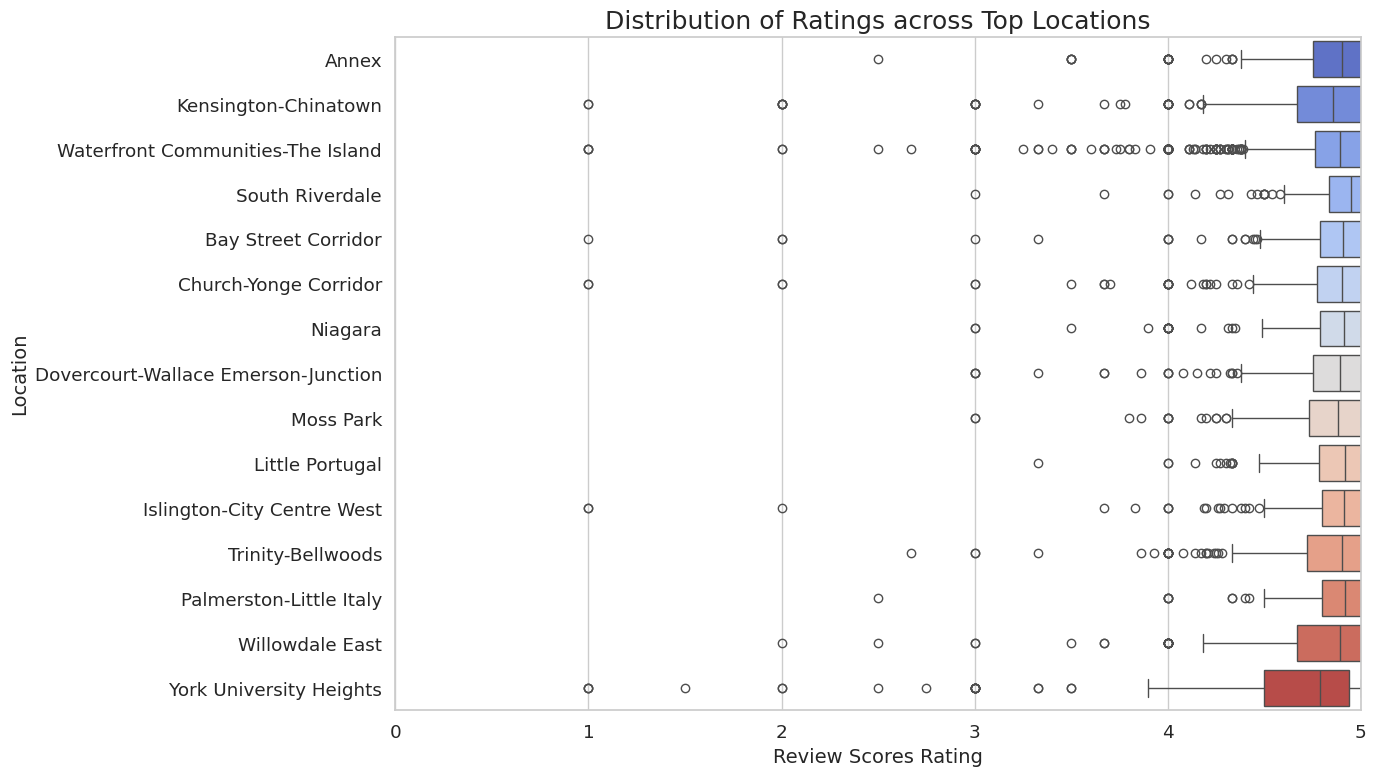

In [132]:
plt.figure(figsize=(14,8))
sns.boxplot(
    y='neighbourhood_cleansed',
    x='review_scores_rating',
    data=listings_top_locations,
    palette="coolwarm",
    orient='h'
)
plt.title('Distribution of Ratings across Top Locations', fontsize=18)
plt.xlabel('Review Scores Rating', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xlim(0, 5)  # Assuming ratings range from 0 to 5
plt.tight_layout()
plt.show()


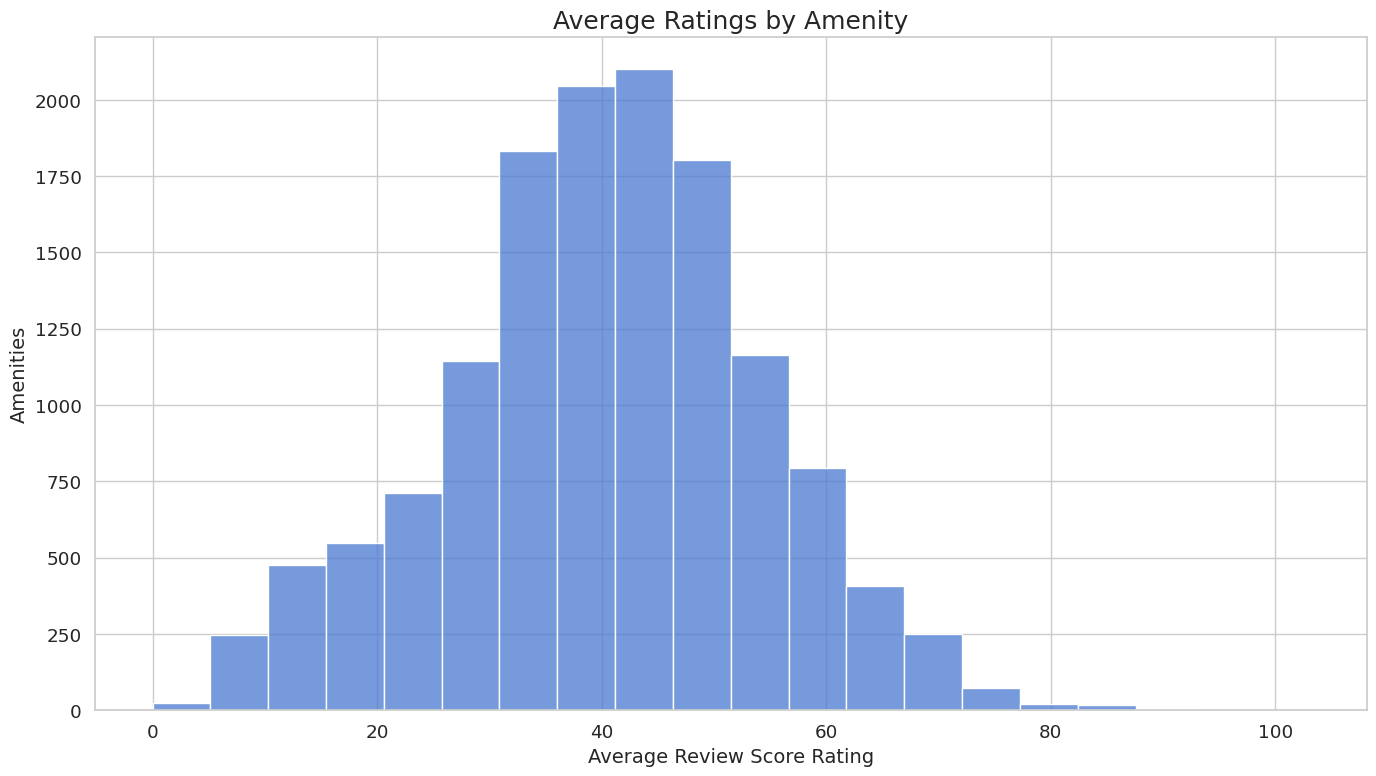

In [133]:
plt.figure(figsize=(14,8))
sns.histplot(
    x='amenities_count',
    data=listings,
    bins=20
)
plt.title('Average Ratings by Amenity', fontsize=18)
plt.xlabel('Average Review Score Rating', fontsize=14)
plt.ylabel('Amenities', fontsize=14)
plt.tight_layout()
plt.show()


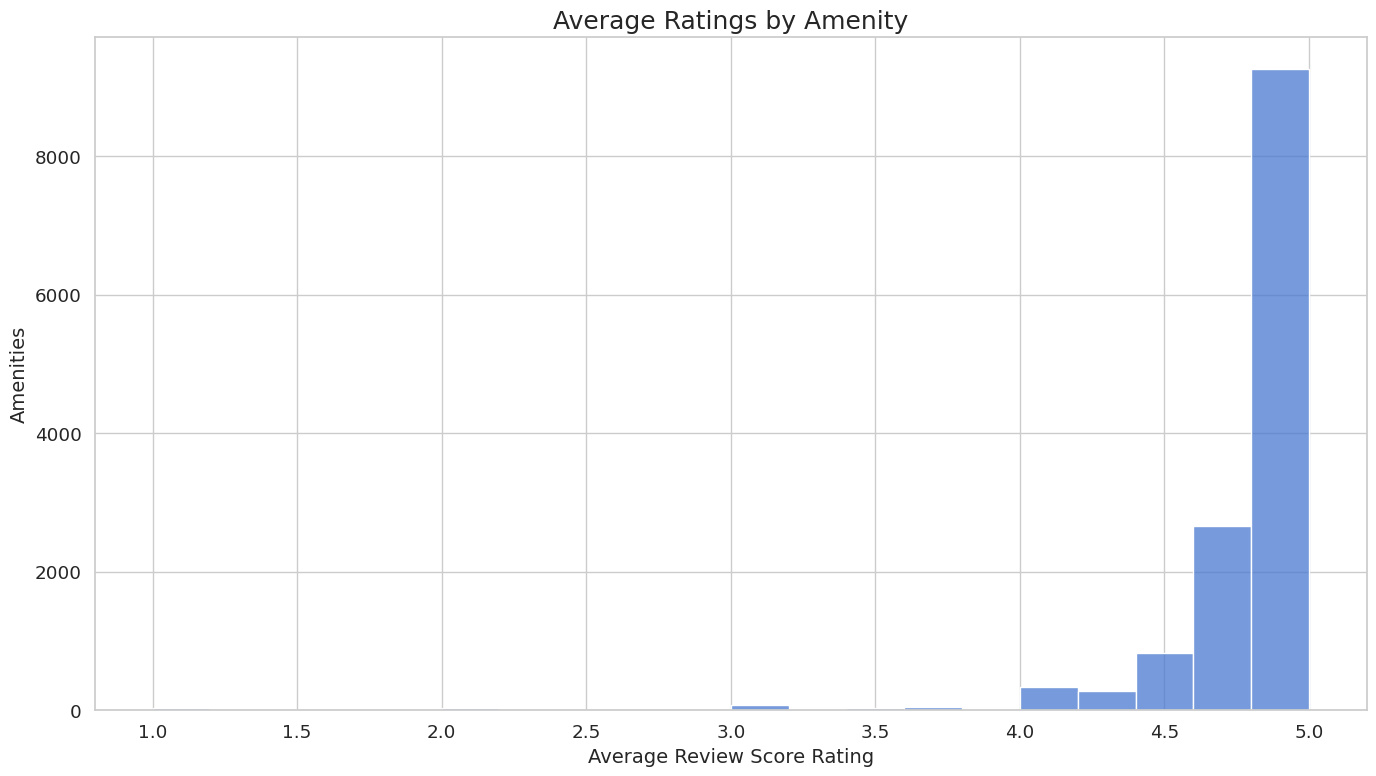

In [134]:
plt.figure(figsize=(14,8))
sns.histplot(
    x='review_scores_rating',
    data=listings,
    bins=20
)
plt.title('Average Ratings by Amenity', fontsize=18)
plt.xlabel('Average Review Score Rating', fontsize=14)
plt.ylabel('Amenities', fontsize=14)
plt.tight_layout()
plt.show()


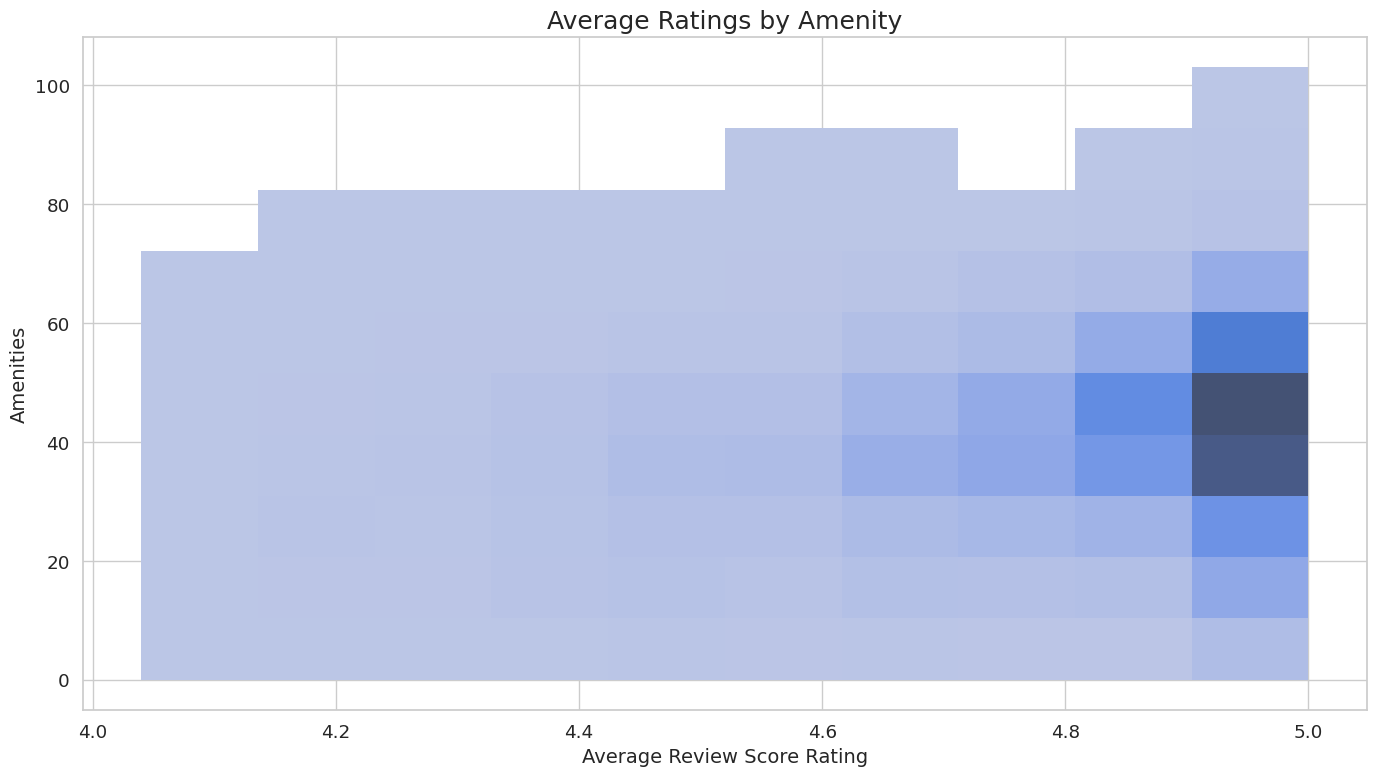

In [135]:
plt.figure(figsize=(14,8))
sns.histplot(
    y='amenities_count',
    x='review_scores_rating',
    data=listings[listings['review_scores_rating'] > 4],
    bins=10
)
plt.title('Average Ratings by Amenity', fontsize=18)
plt.xlabel('Average Review Score Rating', fontsize=14)
plt.ylabel('Amenities', fontsize=14)
plt.tight_layout()
plt.show()


#review

In [136]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,696407278180533419,713696657481444524,2022-09-11,65337174,John,Very nice unit with a great view!
1,696407278180533419,739890699236423174,2022-10-17,127952984,Yuliya,place is better than on the photos. location i...
2,696407278180533419,753655979515222624,2022-11-05,173993584,Nicolas,"Great location, amazing view, good neighbourho..."
3,696407278180533419,758745845104067420,2022-11-12,9475139,Candice,The week-long stay was indeed everything I cou...
4,696407278180533419,766646766641204641,2022-11-23,31422369,Artyom,Great experience! Amazing location! Epic view!...


In [137]:
reviews.shape

(594035, 6)

In [138]:
reviews.dropna(subset=['date'], inplace=True)

reviews['date'] = pd.to_datetime(reviews['date'])


reviews = reviews[reviews['date'].dt.year >= 2022].reset_index(drop=True)
print(reviews.shape)

(354384, 6)


In [139]:
reviews['comments'] = reviews['comments'].fillna('')

In [140]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity == 0:
        sentiment = 'Neutral'
    else:
        sentiment = 'Negative'
    return pd.Series([polarity, sentiment])

reviews[['sentiment_polarity', 'sentiment_category']] = reviews['comments'].apply(get_sentiment)

print(reviews.head())


           listing_id                  id       date  reviewer_id  \
0  696407278180533419  713696657481444524 2022-09-11     65337174   
1  696407278180533419  739890699236423174 2022-10-17    127952984   
2  696407278180533419  753655979515222624 2022-11-05    173993584   
3  696407278180533419  758745845104067420 2022-11-12      9475139   
4  696407278180533419  766646766641204641 2022-11-23     31422369   

  reviewer_name                                           comments  \
0          John                  Very nice unit with a great view!   
1        Yuliya  place is better than on the photos. location i...   
2       Nicolas  Great location, amazing view, good neighbourho...   
3       Candice  The week-long stay was indeed everything I cou...   
4        Artyom  Great experience! Amazing location! Epic view!...   

   sentiment_polarity sentiment_category  
0            0.890000           Positive  
1            0.690833           Positive  
2            0.675000           Pos

<ipython-input-141-9dbf2109875e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='sentiment_category', palette='Set2')


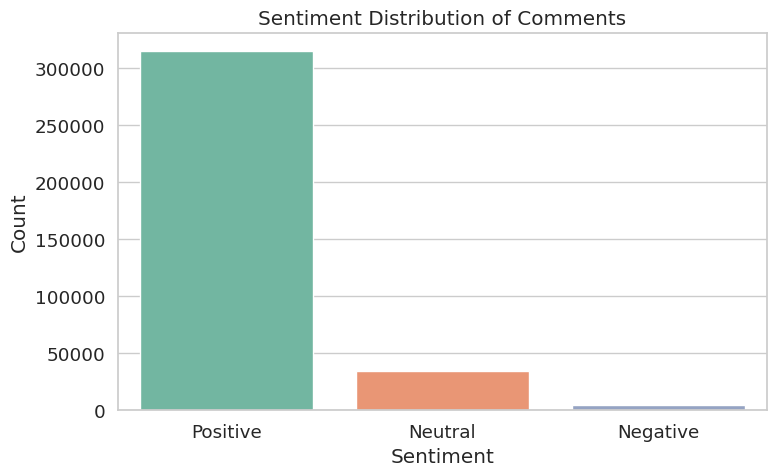

In [141]:
plt.figure(figsize=(8,5))
sns.countplot(data=reviews, x='sentiment_category', palette='Set2')
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [142]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_polarity,sentiment_category
0,696407278180533419,713696657481444524,2022-09-11,65337174,John,Very nice unit with a great view!,0.890000,Positive
1,696407278180533419,739890699236423174,2022-10-17,127952984,Yuliya,place is better than on the photos. location i...,0.690833,Positive
2,696407278180533419,753655979515222624,2022-11-05,173993584,Nicolas,"Great location, amazing view, good neighbourho...",0.675000,Positive
3,696407278180533419,758745845104067420,2022-11-12,9475139,Candice,The week-long stay was indeed everything I cou...,0.370455,Positive
4,696407278180533419,766646766641204641,2022-11-23,31422369,Artyom,Great experience! Amazing location! Epic view!...,0.531250,Positive


In [143]:
functions = {
    'sentiment_polarity': ['mean', 'max', 'min', 'std']
}


agg_reviews = reviews.groupby('listing_id').agg(functions)

agg_reviews.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in agg_reviews.columns]

agg_reviews.head()

,sentiment_polarity_mean,sentiment_polarity_max,sentiment_polarity_min,sentiment_polarity_std
listing_id,,,,
26654,0.241500,0.741667,0.000000,0.303648
27423,0.380523,0.481270,0.259375,0.071274
40456,0.420147,0.563438,0.253252,0.156434
40701,0.462797,0.616667,0.330952,0.111136
44452,0.444669,0.910000,0.000000,0.307116


In [144]:
total_reviews = reviews.groupby('listing_id').size().rename('total_reviews')


sentiment_counts = reviews.pivot_table(index='listing_id',
                                       columns='sentiment_category',
                                       values='comments',
                                       aggfunc='count',
                                       fill_value=0)


sentiment_ratios = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)


sentiment_ratios.columns = [f'{col}_ratio' for col in sentiment_ratios.columns]
sentiment_counts.columns = [f'{col}_count' for col in sentiment_counts.columns]


final_reviews_summary = pd.concat([total_reviews, sentiment_counts, sentiment_ratios, agg_reviews], axis=1).reset_index()

final_reviews_summary.head()


,listing_id,total_reviews,Negative_count,Neutral_count,Positive_count,Negative_ratio,Neutral_ratio,Positive_ratio,sentiment_polarity_mean,sentiment_polarity_max,sentiment_polarity_min,sentiment_polarity_std
0,26654,5,0,2,3,0.0,0.400000,0.600000,0.241500,0.741667,0.000000,0.303648
1,27423,6,0,0,6,0.0,0.000000,1.000000,0.380523,0.481270,0.259375,0.071274
2,40456,3,0,0,3,0.0,0.000000,1.000000,0.420147,0.563438,0.253252,0.156434
3,40701,9,0,0,9,0.0,0.000000,1.000000,0.462797,0.616667,0.330952,0.111136
4,44452,9,0,1,8,0.0,0.111111,0.888889,0.444669,0.910000,0.000000,0.307116


In [145]:
final_reviews_summary.shape

(13662, 12)

###Merging Reviews and Listings

In [146]:
final_reviews_summary['listing_id']

,listing_id
0,26654
1,27423
2,40456
3,40701
4,44452
...,...
13657,1360149854903952385
13658,1362331480938692703
13659,1363197896119450651
13660,1364280421231205552


In [147]:
listings['id']

,id
0,696407278180533419
1,696457318817239920
2,696464107547351397
3,696602542310304703
4,696973520016945803
...,...
13657,1355385238383046824
13658,1362331480938692703
13659,1363197896119450651
13660,1364280421231205552


In [148]:
len(set(listings['id'].astype('int64')).intersection(set(final_reviews_summary['listing_id'].astype('int64'))))

13662

In [149]:
df = pd.merge(listings, final_reviews_summary, left_on='id', right_on='listing_id', how='left')

In [150]:
df.shape

(13662, 51)

In [151]:
df.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,Negative_count,Neutral_count,Positive_count,Negative_ratio,Neutral_ratio,Positive_ratio,sentiment_polarity_mean,sentiment_polarity_max,sentiment_polarity_min,sentiment_polarity_std
0,696407278180533419,134799582,2849.0,4,100.0,76.0,0.0,7.0,7.0,1.0,...,0,1,9,0.000000,0.100000,0.900000,0.574801,0.8900,0.000000,0.260592
1,696457318817239920,471873988,978.0,4,100.0,100.0,1.0,8.0,9.0,1.0,...,0,0,2,0.000000,0.000000,1.000000,0.615909,0.9000,0.331818,0.401765
2,696464107547351397,471873988,978.0,4,100.0,100.0,1.0,8.0,9.0,1.0,...,0,0,2,0.000000,0.000000,1.000000,0.550000,0.8000,0.300000,0.353553
3,696602542310304703,1498613,4858.0,3,100.0,100.0,1.0,1.0,1.0,1.0,...,0,0,11,0.000000,0.000000,1.000000,0.448031,0.9375,0.112143,0.220125
4,696973520016945803,43668850,3492.0,4,100.0,94.0,0.0,1.0,2.0,1.0,...,1,3,22,0.038462,0.115385,0.846154,0.382551,1.0000,-0.023657,0.273602


In [152]:
df.describe()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,Negative_count,Neutral_count,Positive_count,Negative_ratio,Neutral_ratio,Positive_ratio,sentiment_polarity_mean,sentiment_polarity_max,sentiment_polarity_min,sentiment_polarity_std
count,1.366200e+04,1.366200e+04,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,...,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,13662.000000,12071.000000
mean,6.710710e+17,2.503175e+08,2372.660518,3.212780,97.812619,88.573196,0.531474,6.134607,9.963402,0.955058,...,0.305519,2.540258,23.093617,0.016518,0.095733,0.887749,0.402262,0.757199,0.077389,0.228962
std,4.961891e+17,2.147759e+08,1403.548813,1.185288,10.408902,18.690797,0.499027,14.727184,27.998468,0.207185,...,0.750510,4.766131,33.544553,0.075539,0.150309,0.165423,0.131186,0.255441,0.247025,0.081376
min,2.665400e+04,2.851500e+04,39.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,4.700061e+07,4.363353e+07,957.250000,3.000000,100.000000,86.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.842105,0.348702,0.583379,0.000000,0.188017
50%,8.330298e+17,1.839980e+08,2545.000000,4.000000,100.000000,97.000000,1.000000,2.000000,3.000000,1.000000,...,0.000000,1.000000,10.000000,0.000000,0.051282,0.933333,0.405983,0.800000,0.000000,0.233480
75%,1.105211e+18,4.757792e+08,3488.500000,4.000000,100.000000,100.000000,1.000000,4.000000,7.000000,1.000000,...,0.000000,3.000000,30.000000,0.000000,0.133333,1.000000,0.460394,1.000000,0.220222,0.270806
max,1.364984e+18,6.800341e+08,5724.000000,4.000000,100.000000,100.000000,1.000000,283.000000,583.000000,1.000000,...,12.000000,72.000000,447.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.005744


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13662 entries, 0 to 13661
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           13662 non-null  int64  
 1   host_id                      13662 non-null  int64  
 2   host_since                   13662 non-null  float64
 3   host_response_time           13662 non-null  int64  
 4   host_response_rate           13662 non-null  float64
 5   host_acceptance_rate         13662 non-null  float64
 6   host_is_superhost            13662 non-null  float64
 7   host_listings_count          13662 non-null  float64
 8   host_total_listings_count    13662 non-null  float64
 9   host_has_profile_pic         13662 non-null  float64
 10  host_identity_verified       13662 non-null  float64
 11  neighbourhood_cleansed       13662 non-null  int64  
 12  property_type                13662 non-null  int64  
 13  room_type       

##Research Question 1: How should we define and measure 'performance' for Airbnb property managers and hospitality business owners? Which KPIs (Key Performance Indicators) should we consider to assess the success of their listings? Who are the top Hosts?

In [154]:
columns = [
    'host_id',
    'review_scores_rating', 'Positive_ratio', 'sentiment_polarity_mean',
    'host_response_rate', 'host_response_time',
    'host_is_superhost', 'host_acceptance_rate', 'host_identity_verified',
    'reviews_per_month', 'availability_365', 'number_of_reviews_ltm'
]


df_score = df[columns].copy()

scaler = MinMaxScaler()
norm_cols = [col for col in columns if col != 'host_id']
df_score[norm_cols] = scaler.fit_transform(df_score[norm_cols])

df_score['Guest_Satisfaction'] = df_score[['review_scores_rating', 'Positive_ratio', 'sentiment_polarity_mean']].mean(axis=1)

df_score['Responsiveness'] = (df_score['host_response_rate'] + (1 - df_score['host_response_time'])) / 2

df_score['Reliability_Trust'] = df_score[['host_is_superhost', 'host_acceptance_rate', 'host_identity_verified']].mean(axis=1)

df_score['Popularity_Demand'] = df_score[['reviews_per_month', 'availability_365', 'number_of_reviews_ltm']].mean(axis=1)


df_score['HPS'] = (
    0.4 * df_score['Guest_Satisfaction'] +
    0.2 * df_score['Responsiveness'] +
    0.2 * df_score['Reliability_Trust'] +
    0.2 * df_score['Popularity_Demand']
)

host_performance = df_score[['host_id', 'HPS']].sort_values(by='HPS', ascending=False)

print(host_performance.head(10))

         host_id       HPS
12554  654452321  0.819829
9126   236796936  0.812964
11762   47338007  0.811033
8748     9560964  0.808511
9481    91007469  0.808292
5136   214157514  0.807995
9196   544433390  0.807875
7888   519628027  0.806134
688     38711670  0.805552
7566   514550920  0.805460


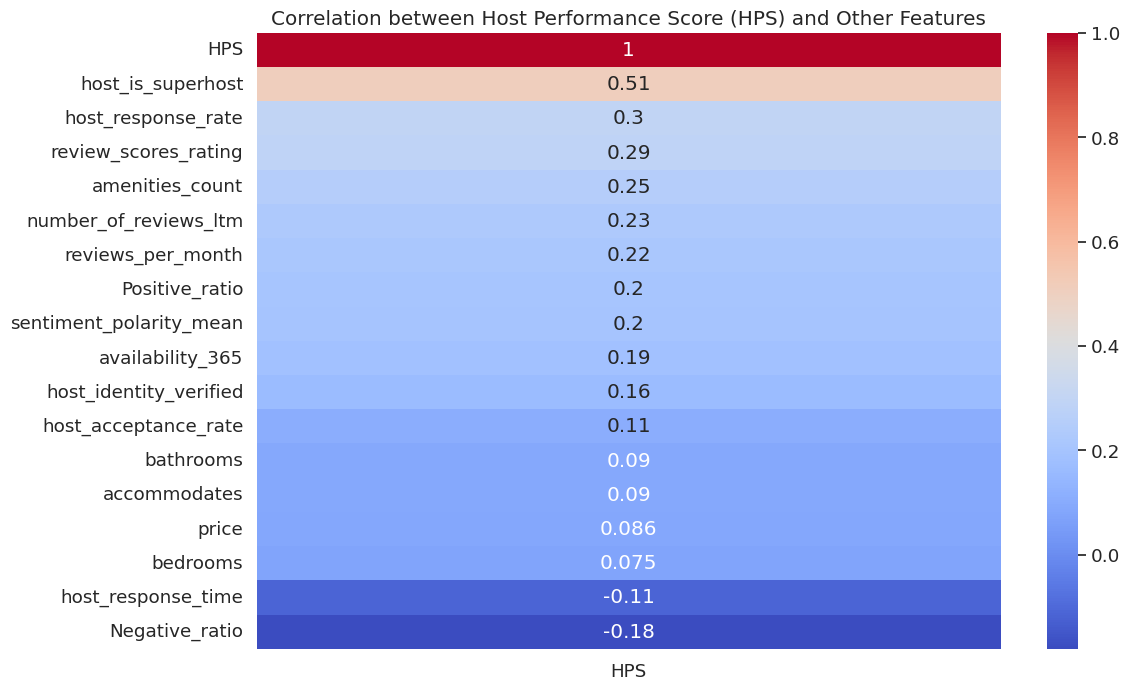

In [155]:
temp_df = pd.merge(df, df_score[['host_id', 'HPS']], on='host_id')

features_to_check = [
    'host_response_rate', 'host_response_time', 'host_acceptance_rate',
    'host_is_superhost', 'host_identity_verified', 'availability_365',
    'reviews_per_month', 'number_of_reviews_ltm', 'Positive_ratio',
    'Negative_ratio', 'sentiment_polarity_mean', 'price', 'amenities_count',
    'accommodates', 'bedrooms', 'bathrooms', "review_scores_rating"
]

corr_matrix = temp_df[['HPS'] + features_to_check].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['HPS']].sort_values(by='HPS', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between Host Performance Score (HPS) and Other Features')
plt.show()

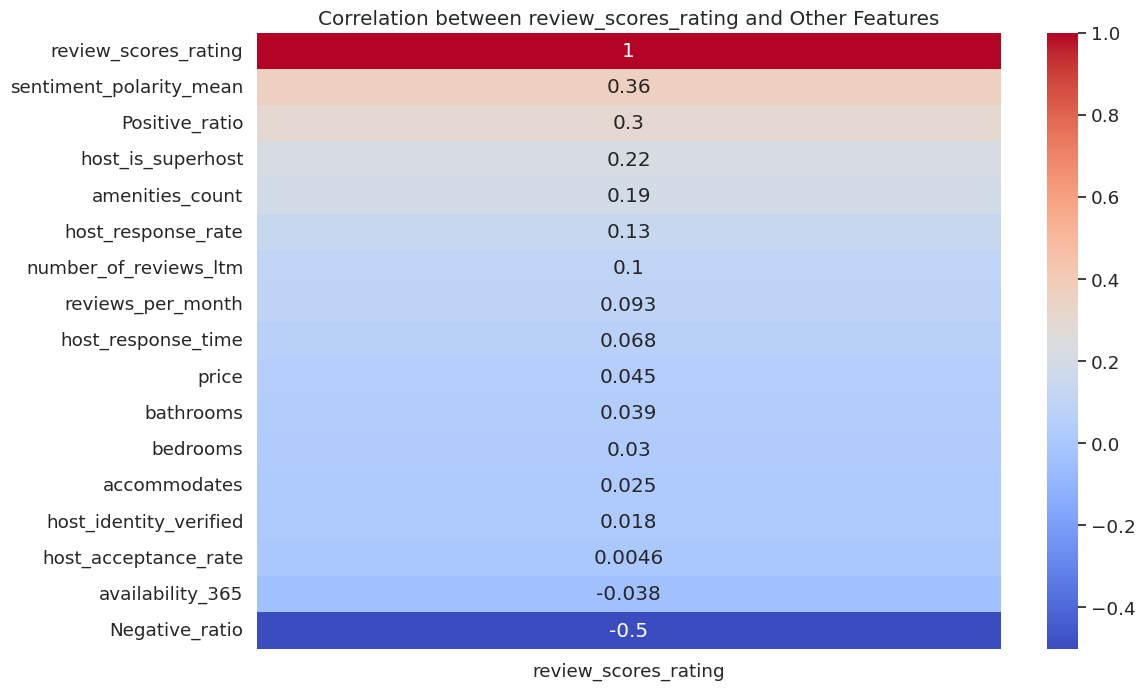

In [156]:

features_to_check = [
    'host_response_rate', 'host_response_time', 'host_acceptance_rate',
    'host_is_superhost', 'host_identity_verified', 'availability_365',
    'reviews_per_month', 'number_of_reviews_ltm', 'Positive_ratio',
    'Negative_ratio', 'sentiment_polarity_mean', 'price', 'amenities_count',
    'accommodates', 'bedrooms', 'bathrooms', "review_scores_rating"
]

corr_matrix = df[features_to_check].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['review_scores_rating']].sort_values(by='review_scores_rating', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between review_scores_rating and Other Features')
plt.show()

##Research Question 1: What is the impact of Superhost Status on listing performance?

In [157]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

Superhosts mean: 4.871432309599229
Non-Superhosts mean: 4.709364161849711
t-test statistic: 24.690, p-value: 0.00000
R^2 score: 0.17775302486814304


<ipython-input-158-6e3630f7a655>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='viridis')


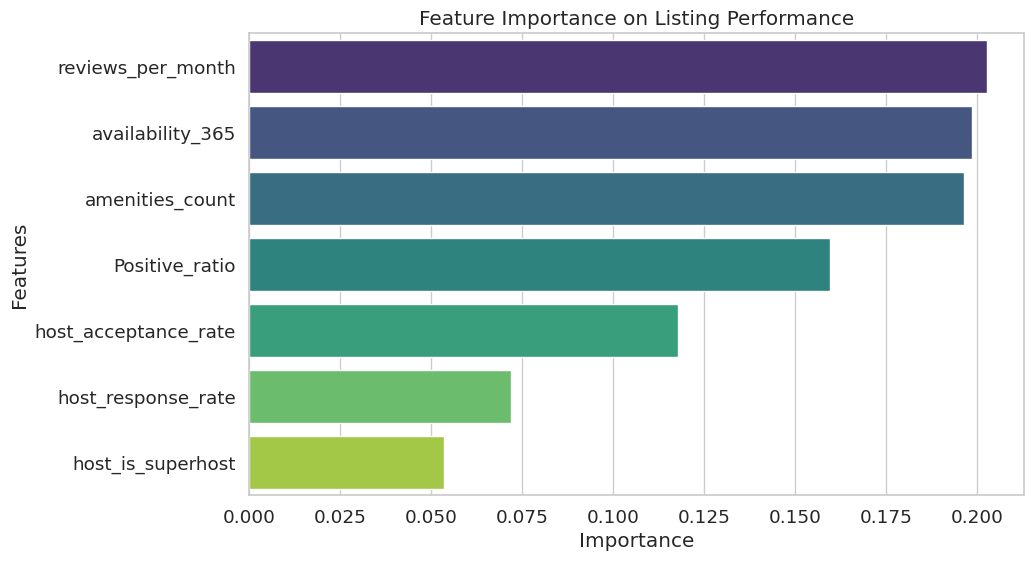

Superhost status has a statistically significant impact on listing performance.


In [158]:
superhosts = df[df['host_is_superhost'] == 1]
non_superhosts = df[df['host_is_superhost'] == 0]

metric = 'review_scores_rating'

print("Superhosts mean:", superhosts[metric].mean())
print("Non-Superhosts mean:", non_superhosts[metric].mean())

stat, p_value = ttest_ind(superhosts[metric], non_superhosts[metric], equal_var=False)
print(f"t-test statistic: {stat:.3f}, p-value: {p_value:.5f}")

features = ['host_is_superhost', 'host_response_rate', 'host_acceptance_rate', 'availability_365',
            'reviews_per_month', 'amenities_count', 'Positive_ratio']

df_rf = df[features + [metric]].dropna()
X = df_rf[features]
y = df_rf[metric]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=15)
model.fit(X_train, y_train)

print("R^2 score:", model.score(X_test, y_test))

importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Feature Importance on Listing Performance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

if p_value < 0.05:
    print("Superhost status has a statistically significant impact on listing performance.")
else:
    print("Superhost status does not show a statistically significant impact.")


## How can hosts optimize their pricing based on listing features and review scores?


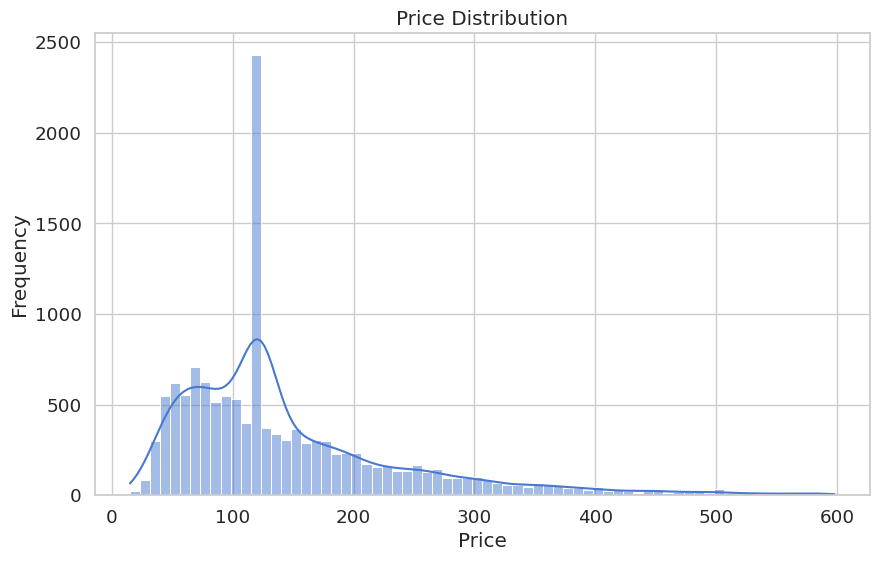

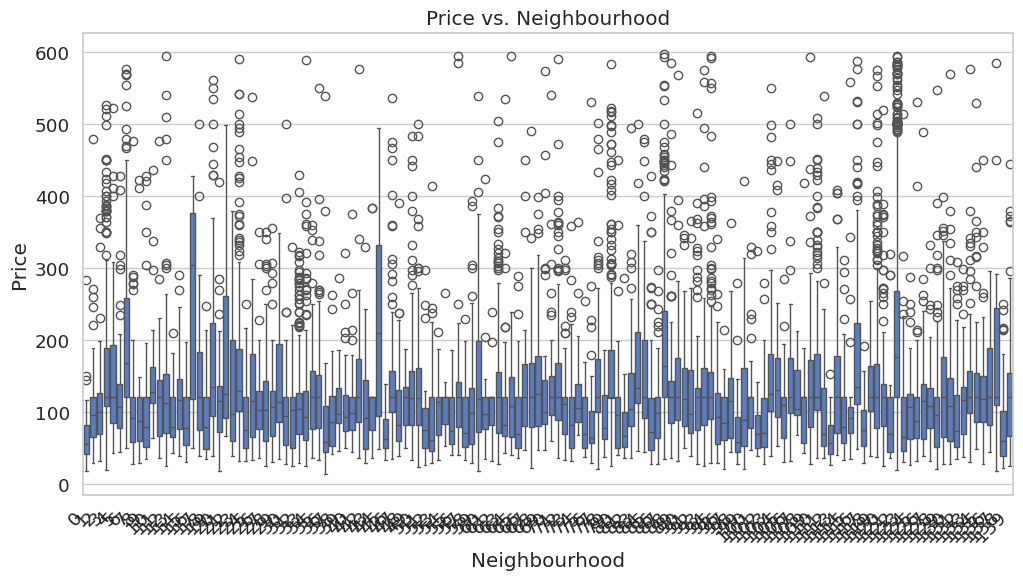

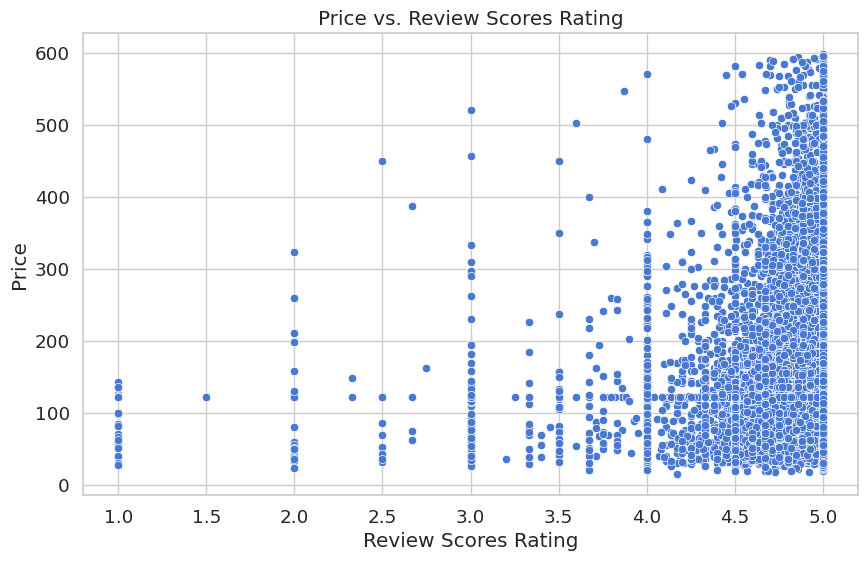

In [159]:
df_filtered = df[df['price'] < 600]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_filtered)
plt.title('Price vs. Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=df_filtered)
plt.title('Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()


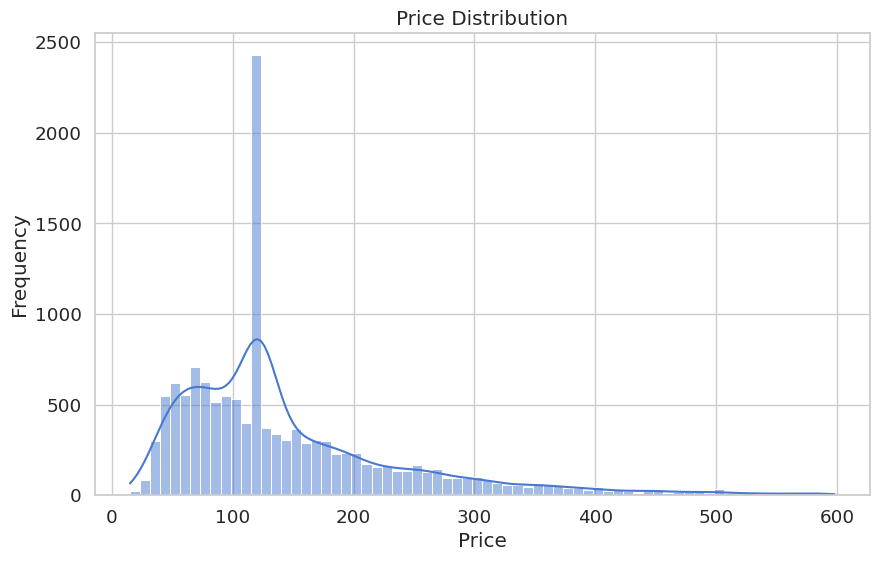

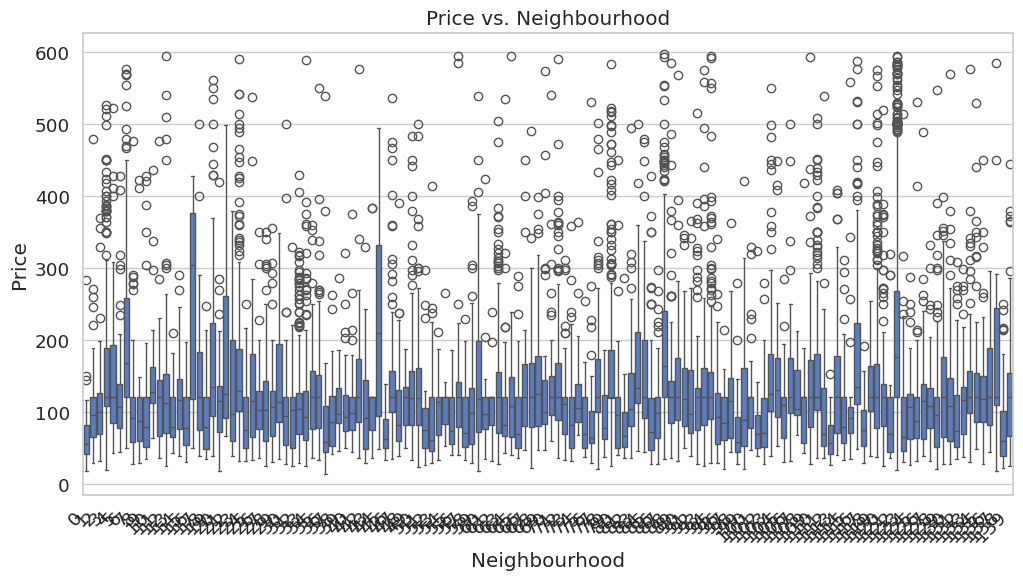

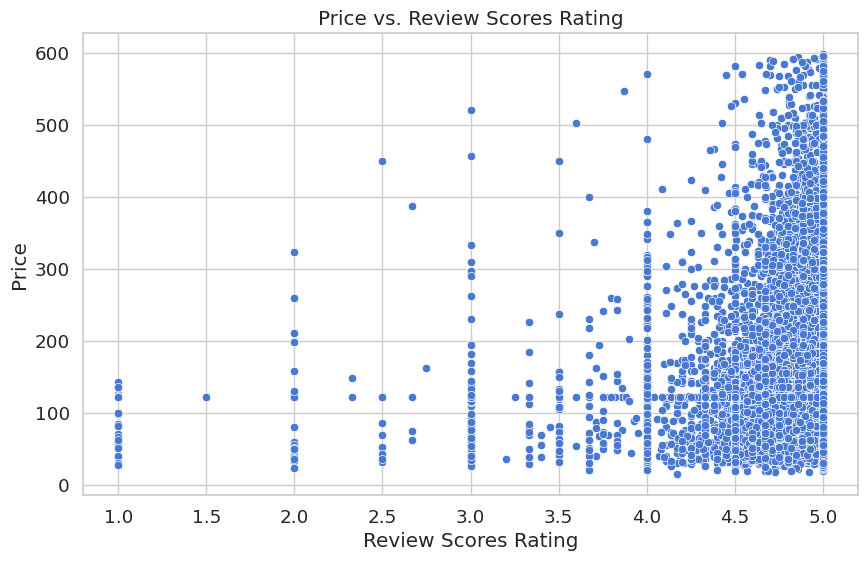

In [160]:
# Assuming 'df' is your DataFrame from the previous code
df_filtered = df[df['price'] < 600]

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot price vs. neighbourhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_filtered)
plt.title('Price vs. Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

#Plot price vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=df_filtered)
plt.title('Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()


In [161]:
df_rf.columns

Index(['host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
       'availability_365', 'reviews_per_month', 'amenities_count',
       'Positive_ratio', 'review_scores_rating'],
      dtype='object')

R^2 score: 0.6119406585233064
MSE: 3828.270098844406
MAE: 40.45651063685441


<ipython-input-162-94e2b87878d5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='viridis')


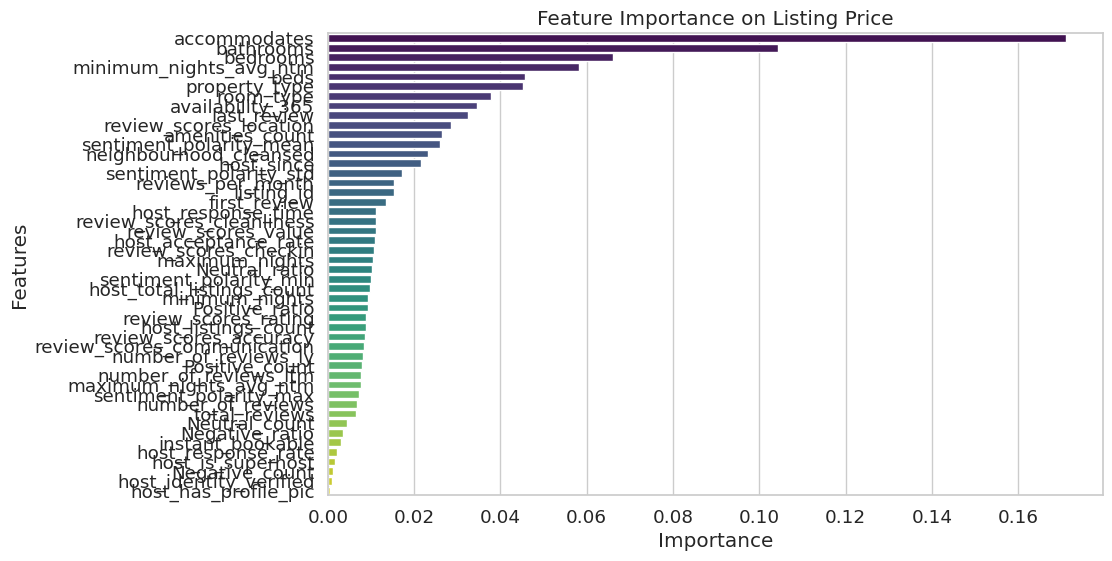

In [162]:
df_rf = df_filtered.dropna()
features = df_rf.columns.drop(["id", "host_id", "price"])
X = df_rf[features]
y = df_rf['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model = RandomForestRegressor(n_estimators=500, random_state=random_state+1, max_depth=40, )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R^2 score:", model.score(X_test, y_test))
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Feature Importance on Listing Price')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


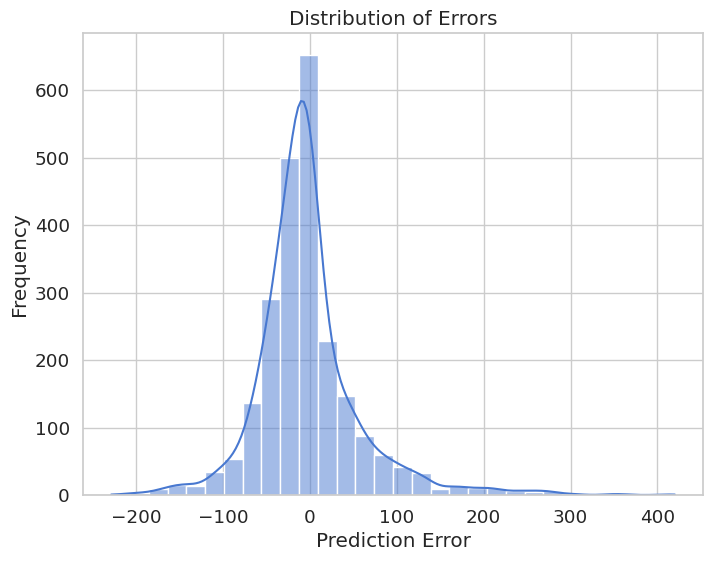

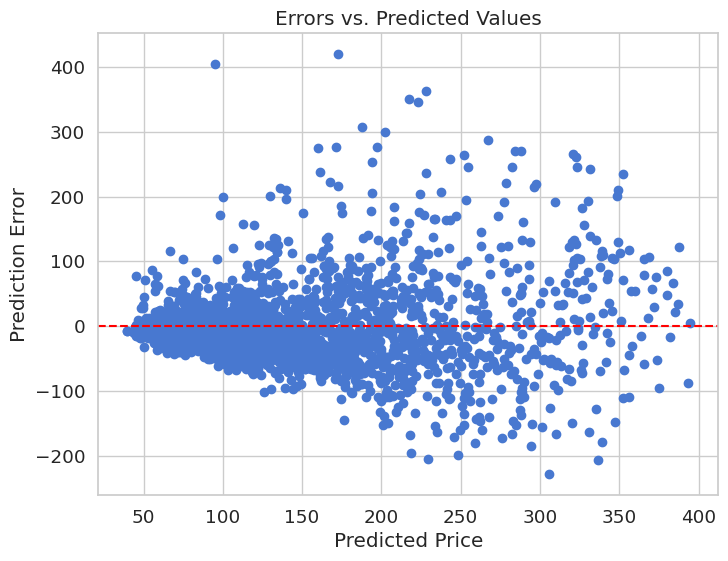

In [163]:
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, errors)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Errors vs. Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Prediction Error')
plt.show()


#Rest

In [164]:
def calculate_entropy(series):
    """Calculate the entropy of a pandas Series (categorical data)."""
    counts = series.value_counts(normalize=True)
    entropy = -np.sum(counts * np.log2(counts + 1e-9))  # add small constant to avoid log(0)
    return entropy


In [165]:
for col in ['room_type']:
    if col in df.columns:
        ent_value = calculate_entropy(df[col])
        print(f"Entropy for '{col}': {ent_value:.4f}")


Entropy for 'room_type': 0.9259


In [166]:
candidate_features = []
if 'price' in df.columns:
    candidate_features.append('price')
if 'review_count' in df.columns:
    candidate_features.append('review_count')
if 'room_type' in df.columns:
    candidate_features.append('room_type')
if 'neighbourhood' in df.columns:
    candidate_features.append('neighbourhood')

In [167]:
target = 'review_scores_rating'

In [168]:
df_mi = df.copy()

In [169]:
for col in candidate_features:
    if df_mi[col].dtype == 'object':
        le = LabelEncoder()
        df_mi[col] = le.fit_transform(df_mi[col].astype(str))

In [170]:
df_mi = df_mi.dropna(subset=[target])


In [171]:
X = df_mi[candidate_features]
y = df_mi[target]

In [172]:
mi_scores = mutual_info_regression(X, y, random_state=0)


In [173]:
for feature, score in zip(candidate_features, mi_scores):
    print(f"{feature}: {score:.4f}")

price: 0.0174
room_type: 0.0100


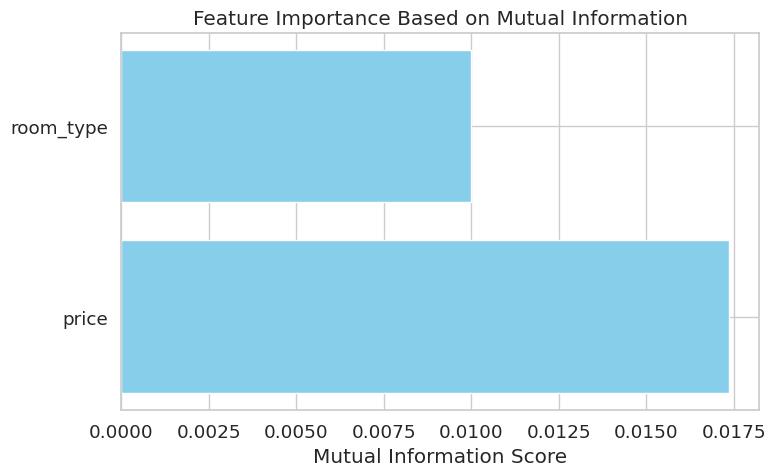

In [174]:
plt.figure(figsize=(8, 5))
plt.barh(candidate_features, mi_scores, color='skyblue')
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance Based on Mutual Information")
plt.tight_layout()
plt.show()

# What features most influence a listing’s likelihood to receive consistent bookings?

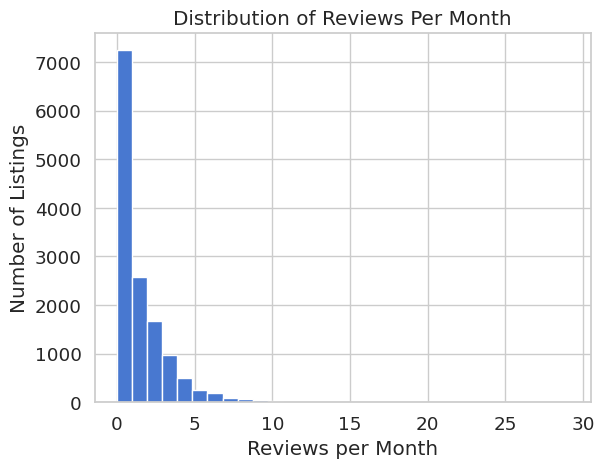

is_popular
0    7467
1    6195
Name: count, dtype: int64


In [175]:
reviews_distribution =listings['reviews_per_month'].dropna()

# Plot distribution
plt.hist(reviews_distribution, bins=30)
plt.title("Distribution of Reviews Per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.show()

# Label listings: 1 = popular, 0 = not popular
threshold = 1.0
listings['is_popular'] = listings['reviews_per_month'].apply(
    lambda x: 1 if pd.notnull(x) and x > threshold else 0
)

# Check label counts
print(listings['is_popular'].value_counts())


# How can hosts optimize their pricing based on listing features and review scores?

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


df = df[df['price'].notnull()]


X = df.drop(columns=['price', 'id', 'host_id','review_scores_rating'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42, max_depth=6)  # limit depth to avoid overfitting
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")



Mean Absolute Error: $75.33
Root Mean Squared Error: $410.04


                      feature  importance
25                last_review    0.285823
27  review_scores_cleanliness    0.208870
13                  bathrooms    0.128064
21          number_of_reviews    0.116303
0                  host_since    0.068778
11                  room_type    0.054182
12               accommodates    0.052451
18     minimum_nights_avg_ntm    0.025720
14                   bedrooms    0.009948
9      neighbourhood_cleansed    0.009484


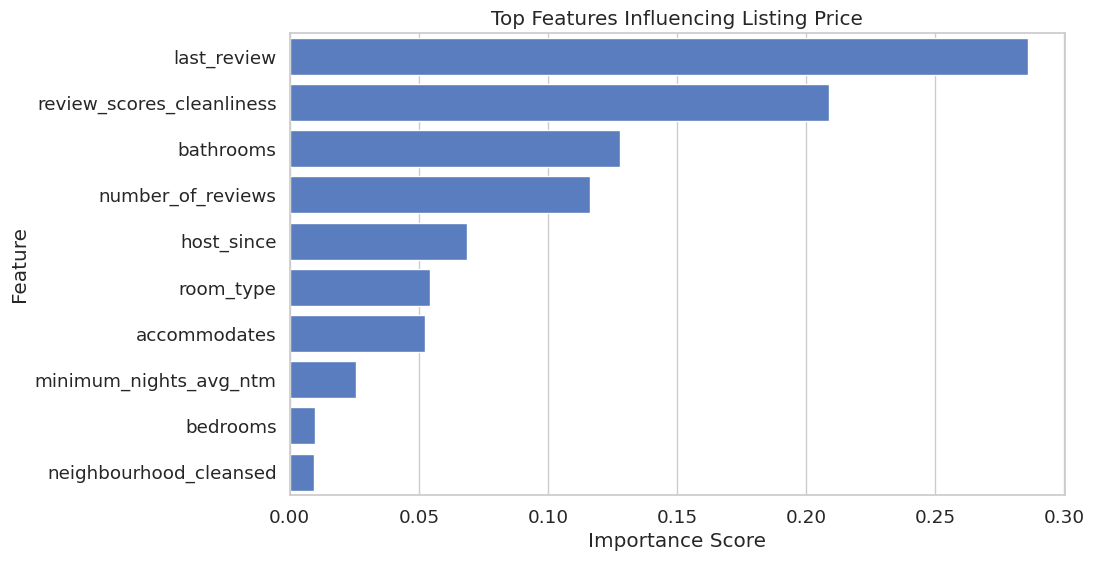

In [177]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': regressor.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title("Top Features Influencing Listing Price")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
